In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. 데이터 전처리

## Matlab 파일들 csv파일로 변환

In [2]:
def load_data(nm,battery): # Example of input load_data('B0006.mat','B0006')
    mat = loadmat(nm)
    print('Total data in cycles: ', len(mat[battery][0, 0]['cycle'][0]))
    counter = 0
    charge_data = []
    discharge_data = []
    capacity_data = []
    
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'charge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                          int(row['time'][0][1]),
                                          int(row['time'][0][2]),
                                          int(row['time'][0][3]),
                                          int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                time = data[0][0]['Time'][0][j]
                charge_data.append([counter + 1, ambient_temperature, date_time,
                                voltage_measured, current_measured,
                                temperature_measured, time])
            counter = counter + 1
    
    print(charge_data[0])
    
    for i in range(len(mat[battery][0, 0]['cycle'][0])):
        row = mat[battery][0, 0]['cycle'][0, i]
        if row['type'][0] == 'discharge':
            ambient_temperature = row['ambient_temperature'][0][0]
            date_time = datetime.datetime(int(row['time'][0][0]),
                                          int(row['time'][0][1]),
                                          int(row['time'][0][2]),
                                          int(row['time'][0][3]),
                                          int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
            data = row['data']
            capacity = data[0][0]['Capacity'][0][0]
            for j in range(len(data[0][0]['Voltage_measured'][0])):
                voltage_measured = data[0][0]['Voltage_measured'][0][j]
                current_measured = data[0][0]['Current_measured'][0][j]
                temperature_measured = data[0][0]['Temperature_measured'][0][j]
                time = data[0][0]['Time'][0][j]
                discharge_data.append([counter + 1, ambient_temperature, date_time, capacity,
                                voltage_measured, current_measured,
                                temperature_measured, time])
            capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
            counter = counter + 1
            
    print(discharge_data[0])
    
    return [pd.DataFrame(data=charge_data,
                         columns=['cycle', 'ambient_temperature', 'datetime',
                                   'voltage_measured','current_measured',
                                  'temperature_measured','time']),
            pd.DataFrame(data=discharge_data,
                         columns=['cycle', 'ambient_temperature', 'datetime',
                                  'capacity', 'voltage_measured',
                                  'current_measured', 'temperature_measured','time']),
            pd.DataFrame(data=capacity_data,
                         columns=['cycle', 'ambient_temperature', 'datetime',
                                  'capacity'])]

## charge, discharge 데이터 합치기

In [3]:
B0005_charge, B0005_discharge, B0005_capacity = load_data('./nasa_mat/B0005.mat','B0005')
B0005_charge['state'] = 1
B0005_discharge['state'] = 2

Total data in cycles:  616
[1, 24, datetime.datetime(2008, 4, 2, 13, 8, 17), 3.873017221300996, -0.001200660698297908, 24.65535783391511, 0.0]
[171, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, 0.0]


In [4]:
# csv 파일 저장
# fuel_cells_df.to_csv('B0005_6_7_18.csv', index=False)

In [5]:
B0005_charge

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,1
1,1,24,2008-04-02 13:08:17,3.479394,-4.030268,24.666480,2.532,1
2,1,24,2008-04-02 13:08:17,4.000588,1.512731,24.675394,5.500,1
3,1,24,2008-04-02 13:08:17,4.012395,1.509063,24.693865,8.344,1
4,1,24,2008-04-02 13:08:17,4.019708,1.511318,24.705069,11.125,1
...,...,...,...,...,...,...,...,...
541168,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,1
541169,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,2.547,1
541170,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,5.500,1
541171,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,8.312,1


In [6]:
B0005_discharge

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,time,state
0,171,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,0.000,2
1,171,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,16.781,2
2,171,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,35.703,2
3,171,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,53.781,2
4,171,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,71.922,2
...,...,...,...,...,...,...,...,...,...
50280,338,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,2781.312,2
50281,338,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,2791.062,2
50282,338,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,2800.828,2
50283,338,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,2810.640,2


In [7]:
# Cycle 일치 시키기
B0005_discharge['cycle'] = B0005_discharge['cycle'] - 170

In [8]:
B0005_discharge

,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,time,state
0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,0.000,2
1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,16.781,2
2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,35.703,2
3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,53.781,2
4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,71.922,2
...,...,...,...,...,...,...,...,...,...
50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,2781.312,2
50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,2791.062,2
50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,2800.828,2
50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,2810.640,2


In [9]:
B0005_capacity

,cycle,ambient_temperature,datetime,capacity
0,171,24,2008-04-02 15:25:41,1.856487
1,172,24,2008-04-02 19:43:48,1.846327
2,173,24,2008-04-03 00:01:06,1.835349
3,174,24,2008-04-03 04:16:37,1.835263
4,175,24,2008-04-03 08:33:25,1.834646
...,...,...,...,...
163,334,24,2008-05-26 10:44:38,1.293464
164,335,24,2008-05-26 15:30:43,1.288003
165,336,24,2008-05-26 20:21:04,1.287453
166,337,24,2008-05-27 15:52:41,1.309015


In [10]:
# assume B0005_charge and B0005_discharge are two data frames with the same columns
B0005_dataset = pd.concat([B0005_charge, B0005_discharge], axis=0)  # axis=0 means concatenate vertically
B0005_dataset = B0005_dataset.sort_values(by='datetime')  # sort by the datetime column
B0005_dataset = B0005_dataset.reset_index(drop=True)

In [11]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,1,NaN
1,1,24,2008-04-02 13:08:17,4.206165,0.151859,24.540692,3562.985,1,NaN
2,1,24,2008-04-02 13:08:17,4.206186,0.151080,24.537357,3574.938,1,NaN
3,1,24,2008-04-02 13:08:17,4.206023,0.148962,24.537892,3587.016,1,NaN
4,1,24,2008-04-02 13:08:17,4.206403,0.150266,24.531517,3599.125,1,NaN
...,...,...,...,...,...,...,...,...,...
591453,170,24,2008-05-28 11:09:42,0.236356,-0.003484,23.372048,0.000,1,NaN
591454,170,24,2008-05-28 11:09:42,0.003365,-0.001496,23.369434,2.547,1,NaN
591455,170,24,2008-05-28 11:09:42,4.985137,0.000506,23.386535,5.500,1,NaN
591456,170,24,2008-05-28 11:09:42,4.984720,0.000442,23.386983,8.312,1,NaN


## 2-0. 충전 기준 데이터 삭제

In [12]:
# 충전 기준 데이터 1/10
# State가 1인 데이터 필터링
state_1_df = B0005_dataset[B0005_dataset['state'] == 1]

# 각 Cycle 기준으로 데이터를 1/10로 줄이기
grouped = state_1_df.groupby('cycle')
selected_rows = []
for cycle, group in grouped:
    num_rows_to_select = int(len(group) / 10)
    selected_rows.extend(group.head(num_rows_to_select).index.tolist())

# 선택된 행만 포함하는 새 데이터프레임 생성
reduced_state_1_df = state_1_df.loc[selected_rows]

# State가 2인 데이터 필터링
state_2_df = B0005_dataset[B0005_dataset['state'] == 2]

# 두 데이터프레임 합치기
B0005_dataset = pd.concat([reduced_state_1_df, state_2_df])

# 인덱스 재정렬
B0005_dataset.reset_index(drop=True, inplace=True)

In [13]:
# 데이터 중에서 50개만 사용
#B0005_dataset = B0005_dataset[(B0005_dataset['cycle'] >= 1) & (B0005_dataset['cycle'] <= 50)]

In [14]:
# 데이터 중에서 51~60까지 사용
B0005_dataset = B0005_dataset[(B0005_dataset['cycle'] >= 1) & (B0005_dataset['cycle'] <= 50)]

In [15]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,1,NaN
1,1,24,2008-04-02 13:08:17,4.206165,0.151859,24.540692,3562.985,1,NaN
2,1,24,2008-04-02 13:08:17,4.206186,0.151080,24.537357,3574.938,1,NaN
3,1,24,2008-04-02 13:08:17,4.206023,0.148962,24.537892,3587.016,1,NaN
4,1,24,2008-04-02 13:08:17,4.206403,0.150266,24.531517,3599.125,1,NaN
...,...,...,...,...,...,...,...,...,...
66656,50,24,2008-04-29 22:00:04,3.653393,-2.012046,30.765091,1040.907,2,1.767364
66657,50,24,2008-04-29 22:00:04,3.655298,-2.012233,30.747708,1031.547,2,1.767364
66658,50,24,2008-04-29 22:00:04,3.544886,-2.010501,32.586171,1640.407,2,1.767364
66659,50,24,2008-04-29 22:00:04,3.736644,-2.012698,30.520805,684.922,2,1.767364


In [16]:
B0005_dataset.describe()

,cycle,ambient_temperature,voltage_measured,current_measured,temperature_measured,time,state,capacity
count,21984.000000,21984.0,21984.000000,21984.000000,21984.000000,21984.00000,21984.000000,12612.000000
mean,31.210471,24.0,3.803396,-0.791869,29.254039,3006.84246,1.573690,1.801714
std,14.228427,0.0,0.344529,1.400033,4.310248,2532.17277,0.494551,0.030906
min,1.000000,24.0,2.455679,-3.601824,23.214802,0.00000,1.000000,1.736091
25%,20.000000,24.0,3.517545,-2.012586,25.171068,1115.68400,1.000000,1.773038
50%,35.000000,24.0,3.802452,-2.010317,28.577604,2363.18800,2.000000,1.804077
75%,43.000000,24.0,4.203587,0.138310,32.741105,3646.60950,2.000000,1.825582
max,50.000000,24.0,4.213259,1.518996,40.712182,10586.96900,2.000000,1.856487


In [17]:
categorical_cols = ['state']

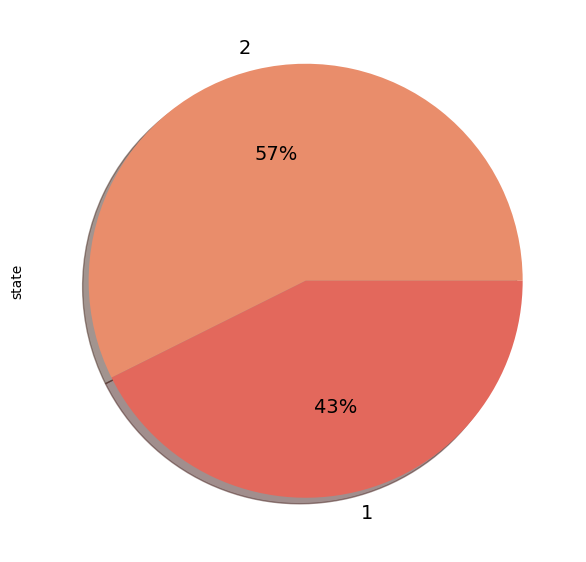

In [18]:
plt.figure(figsize = (7,8))
count = (B0005_dataset['state'].value_counts(normalize=True)*100)
count.plot.pie(colors = sns.color_palette("flare"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},shadow = True)
plt.show()

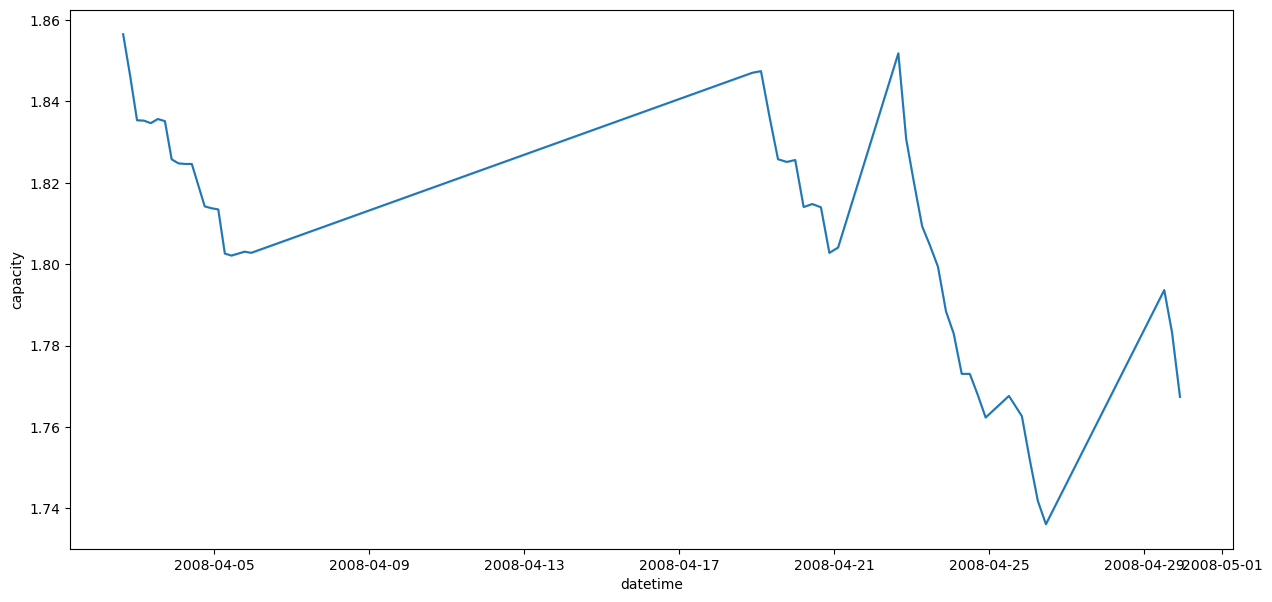

In [19]:
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'datetime', y = 'capacity', data = B0005_dataset, palette = ['r','g','b','y'])
plt.show()

# 2. 데이터 생성

### 추가 데이터(SoH, Soc) 생성

In [20]:
# 데이터 SoH(현재 수용량 / 최초 수용량)
C = 1.856487

In [21]:
for i in range(len(B0005_dataset)):
    B0005_dataset['SoH']=(B0005_dataset['capacity'])/C

In [22]:
B0005_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21984 entries, 0 to 66660
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cycle                 21984 non-null  int64         
 1   ambient_temperature   21984 non-null  uint8         
 2   datetime              21984 non-null  datetime64[ns]
 3   voltage_measured      21984 non-null  float64       
 4   current_measured      21984 non-null  float64       
 5   temperature_measured  21984 non-null  float64       
 6   time                  21984 non-null  float64       
 7   state                 21984 non-null  int64         
 8   capacity              12612 non-null  float64       
 9   SoH                   12612 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), uint8(1)
memory usage: 1.7 MB


In [23]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,1,NaN,NaN
1,1,24,2008-04-02 13:08:17,4.206165,0.151859,24.540692,3562.985,1,NaN,NaN
2,1,24,2008-04-02 13:08:17,4.206186,0.151080,24.537357,3574.938,1,NaN,NaN
3,1,24,2008-04-02 13:08:17,4.206023,0.148962,24.537892,3587.016,1,NaN,NaN
4,1,24,2008-04-02 13:08:17,4.206403,0.150266,24.531517,3599.125,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
66656,50,24,2008-04-29 22:00:04,3.653393,-2.012046,30.765091,1040.907,2,1.767364,0.951994
66657,50,24,2008-04-29 22:00:04,3.655298,-2.012233,30.747708,1031.547,2,1.767364,0.951994
66658,50,24,2008-04-29 22:00:04,3.544886,-2.010501,32.586171,1640.407,2,1.767364,0.951994
66659,50,24,2008-04-29 22:00:04,3.736644,-2.012698,30.520805,684.922,2,1.767364,0.951994


In [24]:
# Create a new column 'SoC' with default value None
B0005_dataset['SoC'] = None

In [25]:
# Function to set SoC values based on conditions
def set_soc_values(df, cycle, state):
    cycle_df = df[(df['cycle'] == cycle) & (df['state'] == state)]
    num_rows = len(cycle_df)

    if state == 1:
        start_value, end_value = 0, 100
    elif state == 2:
        start_value, end_value = 100, 0
    else:
        return

    soc_values = [round(x, 2) for x in np.linspace(start_value, end_value, num_rows)]
    df.loc[cycle_df.index, 'SoC'] = soc_values

In [26]:
# Set SoC values for cycles 1 to 50 and states 1 and 2
for cycle in range(1, 51):
    for state in [1, 2]:
        set_soc_values(B0005_dataset, cycle, state)

In [28]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC
0,1,24,2008-04-02 13:08:17,3.873017,-0.001201,24.655358,0.000,1,NaN,NaN,0.0
1,1,24,2008-04-02 13:08:17,4.206165,0.151859,24.540692,3562.985,1,NaN,NaN,1.3
2,1,24,2008-04-02 13:08:17,4.206186,0.151080,24.537357,3574.938,1,NaN,NaN,2.6
3,1,24,2008-04-02 13:08:17,4.206023,0.148962,24.537892,3587.016,1,NaN,NaN,3.9
4,1,24,2008-04-02 13:08:17,4.206403,0.150266,24.531517,3599.125,1,NaN,NaN,5.19
...,...,...,...,...,...,...,...,...,...,...,...
66656,50,24,2008-04-29 22:00:04,3.653393,-2.012046,30.765091,1040.907,2,1.767364,0.951994,1.14
66657,50,24,2008-04-29 22:00:04,3.655298,-2.012233,30.747708,1031.547,2,1.767364,0.951994,0.85
66658,50,24,2008-04-29 22:00:04,3.544886,-2.010501,32.586171,1640.407,2,1.767364,0.951994,0.57
66659,50,24,2008-04-29 22:00:04,3.736644,-2.012698,30.520805,684.922,2,1.767364,0.951994,0.28


## 2-1. 데이터 스케일링

In [29]:
def scale_column(column, average, min_value, max_value):
    scaled_column = (column - column.min()) / (column.max() - column.min()) * (max_value - min_value) + min_value
    scaled_column[scaled_column < min_value] = min_value
    scaled_column[scaled_column > max_value] = max_value
    return scaled_column

B0005_dataset['voltage_measured'] = scale_column(B0005_dataset['voltage_measured'], 377, 350, 390)
B0005_dataset['current_measured'] = scale_column(B0005_dataset['current_measured'], 100, 0, 200)
B0005_dataset['temperature_measured'] = scale_column(B0005_dataset['temperature_measured'], 25, 15, 40)

In [30]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC
0,1,24,2008-04-02 13:08:17,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0
1,1,24,2008-04-02 13:08:17,389.838536,146.604775,16.894413,3562.985,1,NaN,NaN,1.3
2,1,24,2008-04-02 13:08:17,389.839013,146.574328,16.889647,3574.938,1,NaN,NaN,2.6
3,1,24,2008-04-02 13:08:17,389.835309,146.491609,16.890412,3587.016,1,NaN,NaN,3.9
4,1,24,2008-04-02 13:08:17,389.843971,146.542526,16.881303,3599.125,1,NaN,NaN,5.19
...,...,...,...,...,...,...,...,...,...,...,...
66656,50,24,2008-04-29 22:00:04,377.258240,62.090767,25.787742,1040.907,2,1.767364,0.951994,1.14
66657,50,24,2008-04-29 22:00:04,377.301602,62.083427,25.762906,1031.547,2,1.767364,0.951994,0.85
66658,50,24,2008-04-29 22:00:04,374.788784,62.151095,28.389674,1640.407,2,1.767364,0.951994,0.57
66659,50,24,2008-04-29 22:00:04,379.152915,62.065301,25.438710,684.922,2,1.767364,0.951994,0.28


In [31]:
# Remove duplicate values from the 'datetime' column and keep the first occurrence
B0005_datetime = B0005_dataset.drop_duplicates(subset=['datetime'], keep='first')

# Reset the index of the DataFrame, if needed
B0005_datetime = B0005_datetime.reset_index(drop=True)

## 2-2. 데이터 날짜 재배열

In [32]:
end_time = pd.Timestamp('2023-05-19 09:00:00')

# 가정: B0005_dataset는 이미 pandas DataFrame 형태로 존재
num_rows = len(B0005_dataset)

# 1분 간격의 시간 범위 생성. 행의 수에 맞춰서 생성.
time_range = pd.date_range(start=end_time, periods=num_rows, freq='-1min')

B0005_dataset['datetime'] = time_range[::-1]

In [33]:
B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0
1,1,24,2023-05-04 02:38:00,389.838536,146.604775,16.894413,3562.985,1,NaN,NaN,1.3
2,1,24,2023-05-04 02:39:00,389.839013,146.574328,16.889647,3574.938,1,NaN,NaN,2.6
3,1,24,2023-05-04 02:40:00,389.835309,146.491609,16.890412,3587.016,1,NaN,NaN,3.9
4,1,24,2023-05-04 02:41:00,389.843971,146.542526,16.881303,3599.125,1,NaN,NaN,5.19
...,...,...,...,...,...,...,...,...,...,...,...
66656,50,24,2023-05-19 08:56:00,377.258240,62.090767,25.787742,1040.907,2,1.767364,0.951994,1.14
66657,50,24,2023-05-19 08:57:00,377.301602,62.083427,25.762906,1031.547,2,1.767364,0.951994,0.85
66658,50,24,2023-05-19 08:58:00,374.788784,62.151095,28.389674,1640.407,2,1.767364,0.951994,0.57
66659,50,24,2023-05-19 08:59:00,379.152915,62.065301,25.438710,684.922,2,1.767364,0.951994,0.28


In [34]:
# 시작 시간 설정
#start_time = pd.Timestamp('2023-05-16 10:24:00')

# 가정: B0005_dataset는 이미 pandas DataFrame 형태로 존재
#num_rows = len(B0005_dataset)

# 1분 간격의 시간 범위 생성. 행의 수에 맞춰서 생성.
#time_range = pd.date_range(start=start_time, periods=num_rows, freq='1min')

#B0005_dataset['datetime'] = time_range

## 배터리 일련 번호 생성

### 배터리 셀 일련번호

In [35]:
extended_B0005_dataset = B0005_dataset.loc[B0005_dataset.index.repeat(96)].reset_index(drop=True)
BSN_c_values = ['SN-C' + str(i).zfill(5) for i in range(10001, 10097)]
extended_B0005_dataset['BSN-c'] = BSN_c_values * len(B0005_dataset)

In [36]:
extended_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005
...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095


### 배터리 모듈 일련번호

In [37]:
BSN_m_values = ['SN-M' + str(i).zfill(5) for i in range(10001, 10009)]

def assign_BSN_m(BSN_c_value):
    BSN_c_number = int(BSN_c_value.split('-C')[-1])
    BSN_m_index = (BSN_c_number - 10001) // 12
    return BSN_m_values[BSN_m_index]

extended_B0005_dataset['BSN-m'] = extended_B0005_dataset['BSN-c'].apply(assign_BSN_m)

In [38]:
extended_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008


### 배터리 팩 일련번호

In [39]:
extended_B0005_dataset['BSN-p'] = 'SN-P10001'

In [40]:
extended_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001


In [41]:
bsn_B0005_dataset = extended_B0005_dataset

In [42]:
bsn_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001


## 배터리 전압 데이터 분리

### 배터리 모듈 전압 데이터

In [43]:
import random

In [44]:
def generate_random_number_3():
    return round(random.uniform(-3, 3), 2)

In [45]:
random_values = {BSN_m: generate_random_number_3() for BSN_m in BSN_m_values}

In [46]:
def calculate_voltage_measured_module(row):
    voltage_measured = row['voltage_measured']
    BSN_m = row['BSN-m']
    random_value = random_values[BSN_m]
    return voltage_measured / 8 + random_value

In [47]:
bsn_B0005_dataset['voltage_measured_module'] = bsn_B0005_dataset.apply(calculate_voltage_measured_module, axis=1)

In [48]:
bsn_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p,voltage_measured_module
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001,47.382072
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001,47.382072
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001,47.382072
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001,47.382072
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001,47.382072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001,42.622842
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001,42.622842
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001,42.622842
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001,42.622842


### 배터리 셀 전압 데이터

In [49]:
def generate_random_number_1():
    return round(random.uniform(-1, 1), 2)

In [50]:
random_values = {BSN_c: generate_random_number_1() for BSN_c in BSN_c_values}

In [51]:
def calculate_voltage_measured_cell(row):
    voltage_measured_module = row['voltage_measured_module']
    BSN_c = row['BSN-c']
    random_value = random_values[BSN_c]
    return voltage_measured_module / 12 + random_value


In [52]:
bsn_B0005_dataset['voltage_measured_cell'] = bsn_B0005_dataset.apply(calculate_voltage_measured_cell, axis=1)

In [53]:
bsn_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p,voltage_measured_module,voltage_measured_cell
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001,47.382072,4.688506
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001,47.382072,3.728506
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001,47.382072,3.588506
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001,47.382072,4.538506
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001,47.382072,3.418506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001,42.622842,4.131903
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001,42.622842,4.181903
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001,42.622842,3.301903
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001,42.622842,2.921903


### 배터리 모듈 온도 데이터

In [54]:
random_values = {BSN_m: generate_random_number_3() for BSN_m in BSN_m_values}

In [55]:
def calculate_temperature_measured_module(row):
    temperature_measured = row['temperature_measured']
    BSN_m = row['BSN-m']
    random_value = random_values[BSN_m]
    return temperature_measured + random_value

In [56]:
bsn_B0005_dataset['temperature_measured_module'] = bsn_B0005_dataset.apply(calculate_temperature_measured_module, axis=1)

In [57]:
bsn_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p,voltage_measured_module,voltage_measured_cell,temperature_measured_module
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001,47.382072,4.688506,17.338245
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001,47.382072,3.728506,17.338245
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001,47.382072,3.588506,17.338245
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001,47.382072,4.538506,17.338245
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001,47.382072,3.418506,17.338245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001,42.622842,4.131903,39.470995
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001,42.622842,4.181903,39.470995
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001,42.622842,3.301903,39.470995
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001,42.622842,2.921903,39.470995


In [58]:
bsn_B0005_dataset

,cycle,ambient_temperature,datetime,voltage_measured,current_measured,temperature_measured,time,state,capacity,SoH,SoC,BSN-c,BSN-m,BSN-p,voltage_measured_module,voltage_measured_cell,temperature_measured_module
0,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10001,SN-M10001,SN-P10001,47.382072,4.688506,17.338245
1,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10002,SN-M10001,SN-P10001,47.382072,3.728506,17.338245
2,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10003,SN-M10001,SN-P10001,47.382072,3.588506,17.338245
3,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10004,SN-M10001,SN-P10001,47.382072,4.538506,17.338245
4,1,24,2023-05-04 02:37:00,382.256579,140.626825,17.058245,0.000,1,NaN,NaN,0.0,SN-C10005,SN-M10001,SN-P10001,47.382072,3.418506,17.338245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10092,SN-M10008,SN-P10001,42.622842,4.131903,39.470995
2110460,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10093,SN-M10008,SN-P10001,42.622842,4.181903,39.470995
2110461,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10094,SN-M10008,SN-P10001,42.622842,3.301903,39.470995
2110462,50,24,2023-05-19 09:00:00,363.222733,62.126966,36.590995,3110.969,2,1.767364,0.951994,0.0,SN-C10095,SN-M10008,SN-P10001,42.622842,2.921903,39.470995


In [59]:
final_dataset = pd.DataFrame()

In [60]:
final_dataset['BSM-p'] = bsn_B0005_dataset['BSN-p']
final_dataset['BSM-m'] = bsn_B0005_dataset['BSN-m']
final_dataset['BSM-c'] = bsn_B0005_dataset['BSN-c']
final_dataset['Datetime'] = bsn_B0005_dataset['datetime']
final_dataset['Voltage-p'] = bsn_B0005_dataset['voltage_measured']
final_dataset['Voltage-m'] = bsn_B0005_dataset['voltage_measured_module']
final_dataset['Voltage-c'] = bsn_B0005_dataset['voltage_measured_cell']
final_dataset['Current'] = bsn_B0005_dataset['current_measured']
final_dataset['Temperature-p'] = bsn_B0005_dataset['temperature_measured']
final_dataset['Temperature-m'] = bsn_B0005_dataset['temperature_measured_module']
final_dataset['State'] = bsn_B0005_dataset['state']
final_dataset['Capacity'] = bsn_B0005_dataset['capacity']
final_dataset['SOC'] = bsn_B0005_dataset['SoC']
final_dataset['SOH'] = bsn_B0005_dataset['SoH']
final_dataset['Cycles'] = bsn_B0005_dataset['cycle']

In [61]:
cycles_5_final_dataset = final_dataset

In [62]:
cycles_5_final_dataset

,BSM-p,BSM-m,BSM-c,Datetime,Voltage-p,Voltage-m,Voltage-c,Current,Temperature-p,Temperature-m,State,Capacity,SOC,SOH,Cycles
0,SN-P10001,SN-M10001,SN-C10001,2023-05-04 02:37:00,382.256579,47.382072,4.688506,140.626825,17.058245,17.338245,1,NaN,0.0,NaN,1
1,SN-P10001,SN-M10001,SN-C10002,2023-05-04 02:37:00,382.256579,47.382072,3.728506,140.626825,17.058245,17.338245,1,NaN,0.0,NaN,1
2,SN-P10001,SN-M10001,SN-C10003,2023-05-04 02:37:00,382.256579,47.382072,3.588506,140.626825,17.058245,17.338245,1,NaN,0.0,NaN,1
3,SN-P10001,SN-M10001,SN-C10004,2023-05-04 02:37:00,382.256579,47.382072,4.538506,140.626825,17.058245,17.338245,1,NaN,0.0,NaN,1
4,SN-P10001,SN-M10001,SN-C10005,2023-05-04 02:37:00,382.256579,47.382072,3.418506,140.626825,17.058245,17.338245,1,NaN,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110459,SN-P10001,SN-M10008,SN-C10092,2023-05-19 09:00:00,363.222733,42.622842,4.131903,62.126966,36.590995,39.470995,2,1.767364,0.0,0.951994,50
2110460,SN-P10001,SN-M10008,SN-C10093,2023-05-19 09:00:00,363.222733,42.622842,4.181903,62.126966,36.590995,39.470995,2,1.767364,0.0,0.951994,50
2110461,SN-P10001,SN-M10008,SN-C10094,2023-05-19 09:00:00,363.222733,42.622842,3.301903,62.126966,36.590995,39.470995,2,1.767364,0.0,0.951994,50
2110462,SN-P10001,SN-M10008,SN-C10095,2023-05-19 09:00:00,363.222733,42.622842,2.921903,62.126966,36.590995,39.470995,2,1.767364,0.0,0.951994,50


In [63]:
cycles_5_final_dataset.describe()

,Voltage-p,Voltage-m,Voltage-c,Current,Temperature-p,Temperature-m,State,Capacity,SOH,Cycles
count,2.110464e+06,2.110464e+06,2.110464e+06,2.110464e+06,2.110464e+06,2.110464e+06,2.110464e+06,1.210752e+06,1.210752e+06,2.110464e+06
mean,3.806721e+02,4.742526e+01,3.842418e+00,1.097463e+02,2.362877e+01,2.516127e+01,1.573690e+00,1.801714e+00,9.704965e-01,3.121047e+01
std,7.840816e+00,1.807647e+00,5.684583e-01,5.467882e+01,6.158281e+00,6.284970e+00,4.945401e-01,3.090431e-02,1.664666e-02,1.422811e+01
min,3.500000e+02,4.097000e+01,2.524167e+00,0.000000e+00,1.500000e+01,1.464000e+01,1.000000e+00,1.736091e+00,9.351487e-01,1.000000e+00
25%,3.741665e+02,4.625305e+01,3.355064e+00,6.206964e+01,1.779508e+01,1.963983e+01,1.000000e+00,1.773038e+00,9.550499e-01,2.000000e+01
50%,3.806506e+02,4.739191e+01,3.768042e+00,6.215827e+01,2.266229e+01,2.423918e+01,2.000000e+00,1.804077e+00,9.717693e-01,3.500000e+01
75%,3.897799e+02,4.845495e+01,4.379503e+00,1.460756e+02,2.861104e+01,3.018768e+01,2.000000e+00,1.825582e+00,9.833527e-01,4.300000e+01
max,3.900000e+02,5.171000e+01,5.029167e+00,2.000000e+02,4.000000e+01,4.295000e+01,2.000000e+00,1.856487e+00,1.000000e+00,5.000000e+01


In [64]:
cycles_5_final_dataset.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
Voltage-p,2110464.0,380.672093,7.840816,350.000000,374.166533,380.650621,389.779883,390.000000
Voltage-m,2110464.0,47.425262,1.807647,40.970000,46.253050,47.391912,48.454948,51.710000
Voltage-c,2110464.0,3.842418,0.568458,2.524167,3.355064,3.768042,4.379503,5.029167
Current,2110464.0,109.746273,54.678819,0.000000,62.069644,62.158275,146.075577,200.000000
Temperature-p,2110464.0,23.628774,6.158281,15.000000,17.795084,22.662292,28.611042,40.000000
Temperature-m,2110464.0,25.161274,6.284970,14.640000,19.639827,24.239181,30.187678,42.950000
State,2110464.0,1.573690,0.494540,1.000000,1.000000,2.000000,2.000000,2.000000
Capacity,1210752.0,1.801714,0.030904,1.736091,1.773038,1.804077,1.825582,1.856487
SOH,1210752.0,0.970496,0.016647,0.935149,0.955050,0.971769,0.983353,1.000000
Cycles,2110464.0,31.210471,14.228106,1.000000,20.000000,35.000000,43.000000,50.000000


In [65]:
# csv 파일 저장
cycles_5_final_dataset.to_csv('cycles_0519_09_final_dataset.csv', index=False)

In [ ]:
# csv 파일 저장
cycles_5_final_dataset.to_csv('cycles_0519_09_final_dataset.csv', index=False)